**Import Libiraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Load Data**

In [18]:
df=pd.read_csv('credit_risk_dataset.csv')

In [19]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


**EDA**

/tmp/ipython-input-3953466651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


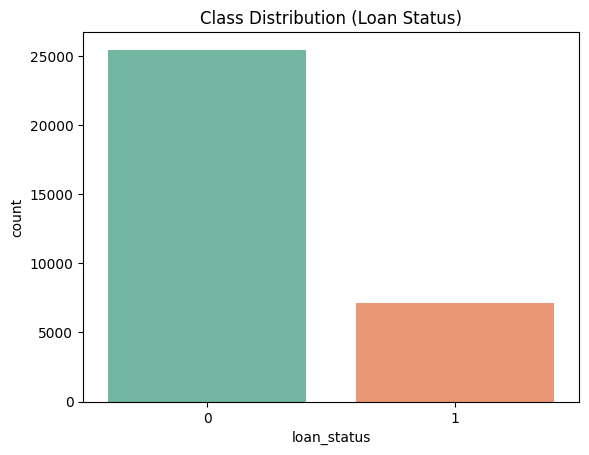

In [20]:
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title("Class Distribution (Loan Status)")
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [22]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Handling Missing Values**

In [23]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [24]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

df.isnull().sum()

/tmp/ipython-input-1929226365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
/tmp/ipython-input-1929226365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


**Encoding**

In [25]:
le = LabelEncoder()

df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

In [26]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

In [27]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False


**Train/Test Split + Scaling**

In [28]:
X = df.drop(['loan_status'], axis=1)
Y = df['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

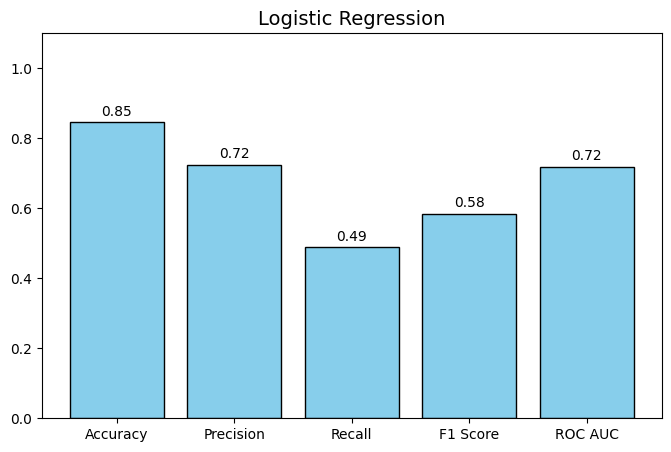

In [30]:
lr=LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train_scaled, Y_train)
y_pred_lr=lr.predict(X_test_scaled)

accuracy  = accuracy_score(Y_test, y_pred_lr)
precision = precision_score(Y_test, y_pred_lr)
recall    = recall_score(Y_test, y_pred_lr)
f1        = f1_score(Y_test, y_pred_lr)
roc_auc   = roc_auc_score(Y_test, y_pred_lr)

metrics = [accuracy, precision, recall, f1, roc_auc]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

plt.figure(figsize=(8,5))
bars = plt.bar(names, metrics, color='skyblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Logistic Regression", fontsize=14)
plt.ylim(0,1.1)
plt.show()

**Decision Tree**

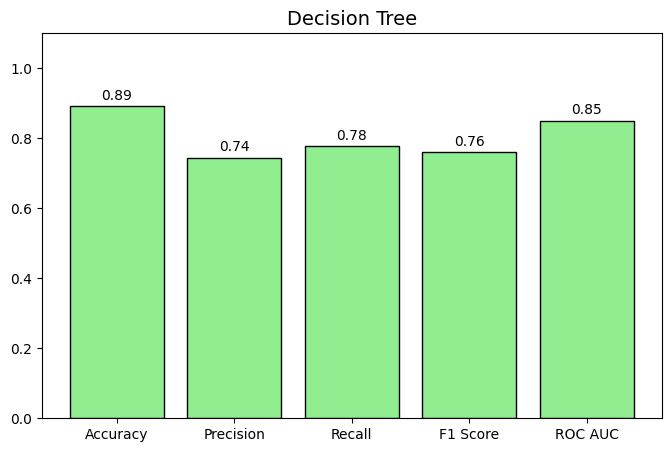

In [31]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, Y_train)
y_pred_dt = dt.predict(X_test_scaled)

accuracy  = accuracy_score(Y_test, y_pred_dt)
precision = precision_score(Y_test, y_pred_dt)
recall    = recall_score(Y_test, y_pred_dt)
f1        = f1_score(Y_test, y_pred_dt)
roc_auc   = roc_auc_score(Y_test, y_pred_dt)

metrics = [accuracy, precision, recall, f1, roc_auc]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

plt.figure(figsize=(8,5))
bars = plt.bar(names, metrics, color='lightgreen', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Decision Tree", fontsize=14)
plt.ylim(0,1.1)
plt.show()

**Random Forest**

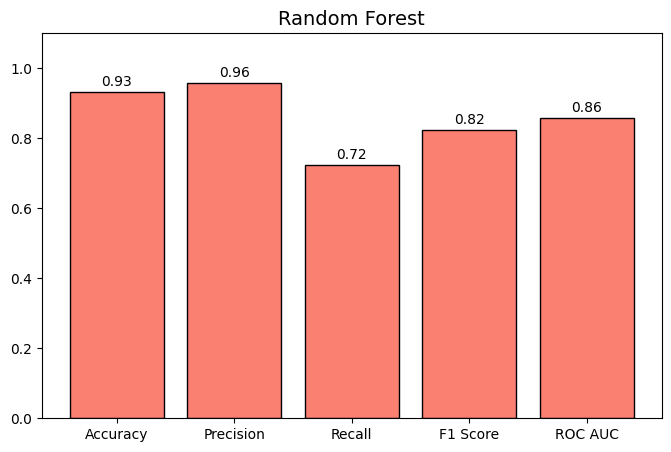

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_scaled, Y_train)
y_pred_rf = rf.predict(X_test_scaled)

accuracy  = accuracy_score(Y_test, y_pred_rf)
precision = precision_score(Y_test, y_pred_rf)
recall    = recall_score(Y_test, y_pred_rf)
f1        = f1_score(Y_test, y_pred_rf)
roc_auc   = roc_auc_score(Y_test, y_pred_rf)

metrics = [accuracy, precision, recall, f1, roc_auc]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

plt.figure(figsize=(8,5))
bars = plt.bar(names, metrics, color='salmon', edgecolor='black')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Random Forest", fontsize=14)
plt.ylim(0,1.1)
plt.show()

**Model Comparison**

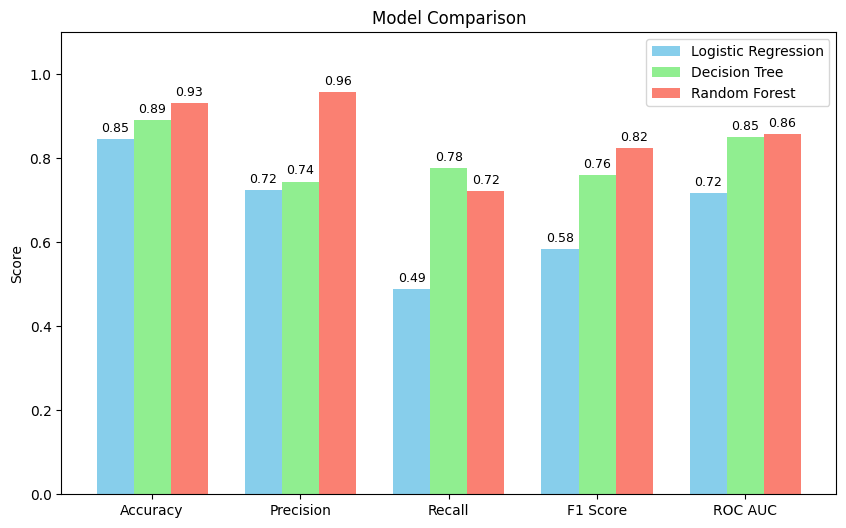

In [33]:
lr_metrics = [
    accuracy_score(Y_test, y_pred_lr),
    precision_score(Y_test, y_pred_lr),
    recall_score(Y_test, y_pred_lr),
    f1_score(Y_test, y_pred_lr),
    roc_auc_score(Y_test, y_pred_lr)
]

dt_metrics = [
    accuracy_score(Y_test, y_pred_dt),
    precision_score(Y_test, y_pred_dt),
    recall_score(Y_test, y_pred_dt),
    f1_score(Y_test, y_pred_dt),
    roc_auc_score(Y_test, y_pred_dt)
]

rf_metrics = [
    accuracy_score(Y_test, y_pred_rf),
    precision_score(Y_test, y_pred_rf),
    recall_score(Y_test, y_pred_rf),
    f1_score(Y_test, y_pred_rf),
    roc_auc_score(Y_test, y_pred_rf)
]

names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
x = np.arange(len(names))

width = 0.25

plt.figure(figsize=(10,6))

bars1 = plt.bar(x - width, lr_metrics, width, label='Logistic Regression', color='skyblue')
bars2 = plt.bar(x, dt_metrics, width, label='Decision Tree', color='lightgreen')
bars3 = plt.bar(x + width, rf_metrics, width, label='Random Forest', color='salmon')

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
                 ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.xticks(x, names)
plt.ylim(0,1.1)
plt.ylabel("Score")
plt.title("Model Comparison")
plt.legend()
plt.show()